In [1]:
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import awkward as ak
import os
from collections import defaultdict


In [2]:
df = pd.read_csv("rechits_50000_events.csv")

In [3]:
ratios = np.load('rechit_energy_ratios.npz')

In [29]:
ratios

NpzFile 'rechit_energy_ratios.npz' with keys: z_energy_sum, e1_over_e7, e7_over_e19

In [31]:
ratios['e1_over_e7'].shape

(28, 50000)

In [3]:
df.head()

,event,nhits,target_energy,energy,x,y,z
0,0,1115,286.60653,29.806881,-1.943527,1.122096,13.8775
1,0,1115,286.60653,1.379653,0.000000,1.122096,14.7675
2,0,1115,286.60653,5.812507,-1.943527,2.244192,14.7675
3,0,1115,286.60653,99.901855,-1.943527,1.122096,14.7675
4,0,1115,286.60653,0.766559,-2.915291,-1.683144,14.7675


In [5]:
rechit_z = df['z']

In [6]:
Sorted_Z = np.sort(np.unique(rechit_z))

In [6]:
Sorted_Z

array([13.87749958, 14.76749992, 16.78249931, 17.67250061, 19.6875    ,
       20.57749939, 22.69249916, 23.58250046, 25.69750023, 26.58749962,
       28.70249939, 29.59250069, 31.50749969, 32.39749908, 34.3125    ,
       35.20249939, 37.11750031, 38.00749969, 39.92250061, 40.8125    ,
       42.90750122, 44.03749847, 46.41249847, 47.54249954, 49.68199921,
       50.68799973, 52.88150024, 53.9034996 ])

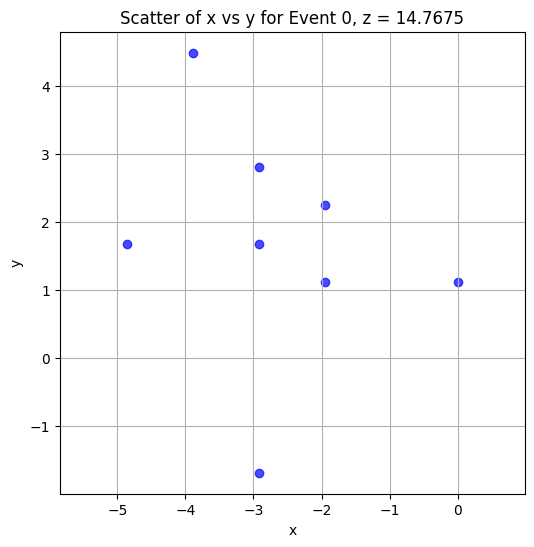

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for a single event
event_id = 0
event_df = df[df['event'] == event_id]

# Choose a unique z-plane
unique_z = 14.7675  # Or use: event_df['z'].unique()[0]
z_plane_df = event_df[event_df['z'] == Sorted_Z[1]]

# Plot x vs y
plt.figure(figsize=(6, 6))
plt.scatter(z_plane_df['x'], z_plane_df['y'], c='blue', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Scatter of x vs y for Event {event_id}, z = {unique_z}')
plt.grid(True)
plt.axis('equal')  # For equal x/y aspect ratio
plt.show()


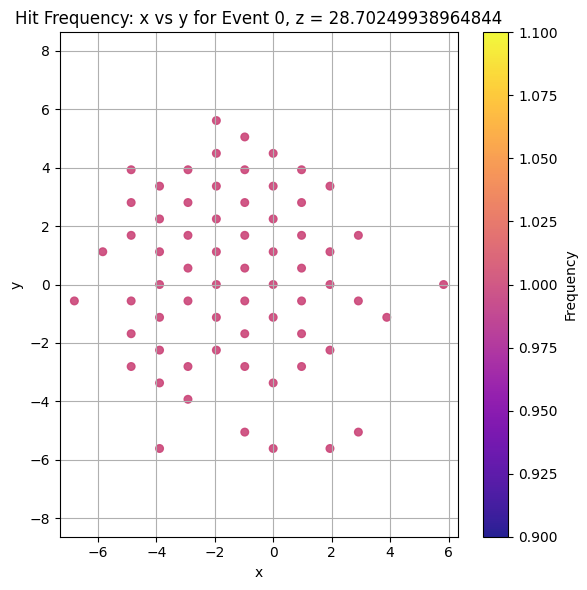

In [9]:
# Filter for a single event
event_id = 0
event_df = df[df['event'] == event_id]

# Sort Z if not already
Sorted_Z = sorted(event_df['z'].unique())
unique_z = Sorted_Z[10]

# Select hits in that z-plane
z_plane_df = event_df[event_df['z'] == unique_z]

# Count frequency of each (x, y) pair
xy_freq = z_plane_df.groupby(['x', 'y']).size().reset_index(name='frequency')

# Plot
plt.figure(figsize=(6, 6))
sc = plt.scatter(
    xy_freq['x'], xy_freq['y'],
    c=xy_freq['frequency'], cmap='plasma', s=30, alpha=0.9
)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit Frequency: x vs y for Event {event_id}, z = {unique_z}')
plt.colorbar(sc, label='Frequency')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


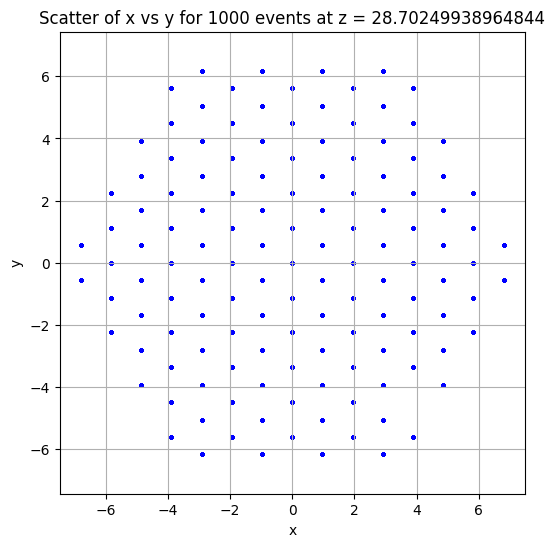

In [10]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[10]

# Filter only 1000 events
event_ids = df['event'].unique()[:50000]

# Filter data for those events at selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot x vs y
plt.figure(figsize=(6, 6))
plt.scatter(filtered_df['x'], filtered_df['y'], c='blue', s=2, alpha=0.6)
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Scatter of x vs y for 1000 events at z = {selected_z}')
plt.grid(True)
plt.axis('equal')  # Keeps aspect ratio
plt.show()


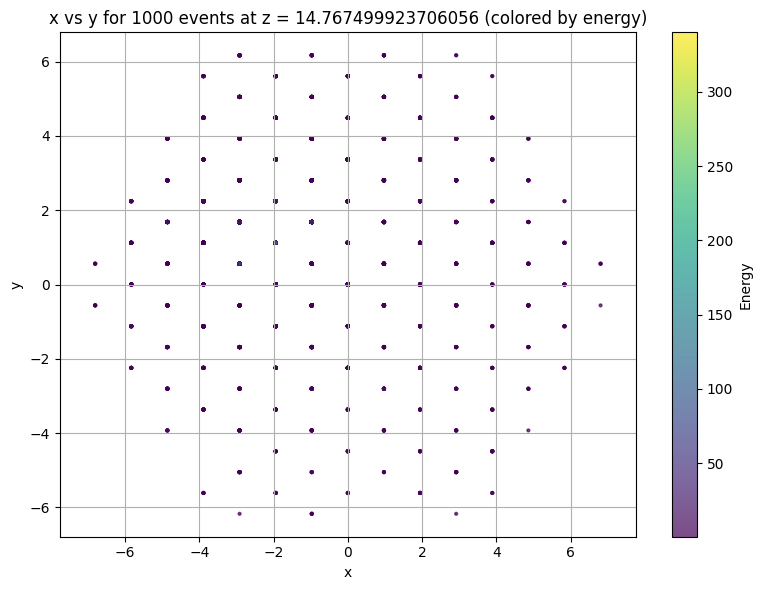

In [11]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[1]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=4, alpha=0.7
)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1000 events at z = {selected_z} (colored by energy)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


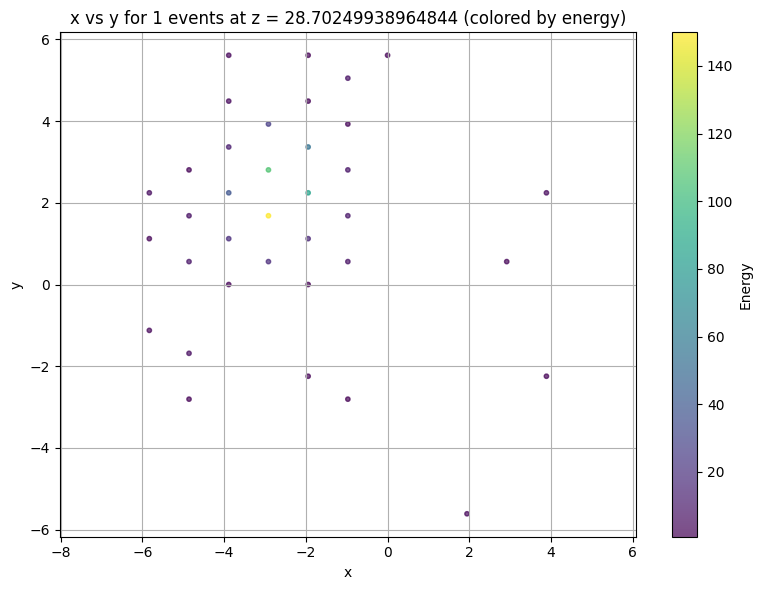

In [6]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[10]

# Get first 1000 events
event_ids = df['event'].unique()[10:11]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=10, alpha=0.7  # s increased to 10
)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1 events at z = {selected_z} (colored by energy)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


/tmp/ipykernel_8366/2234958408.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['r2'] = filtered_df['x']**2 + filtered_df['y']**2


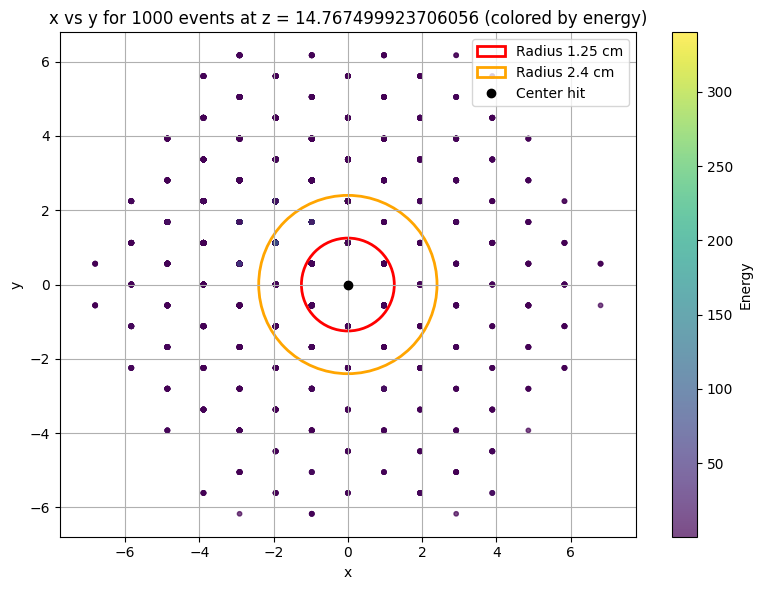

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[1]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Find the hit closest to (0, 0)
filtered_df['r2'] = filtered_df['x']**2 + filtered_df['y']**2
center_hit = filtered_df.loc[filtered_df['r2'].idxmin()]
x0, y0 = center_hit['x'], center_hit['y']

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=10, alpha=0.7
)

# Draw circles centered at the center hit
circle1 = patches.Circle((x0, y0), radius=1.25, edgecolor='red', facecolor='none', linewidth=2, label='Radius 1.25 cm')
circle2 = patches.Circle((x0, y0), radius=2.4, edgecolor='orange', facecolor='none', linewidth=2, label='Radius 2.4 cm')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

# Plot center hit for visual reference
plt.plot(x0, y0, 'ko', label='Center hit')

# Labels and layout
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1000 events at z = {selected_z} (colored by energy)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


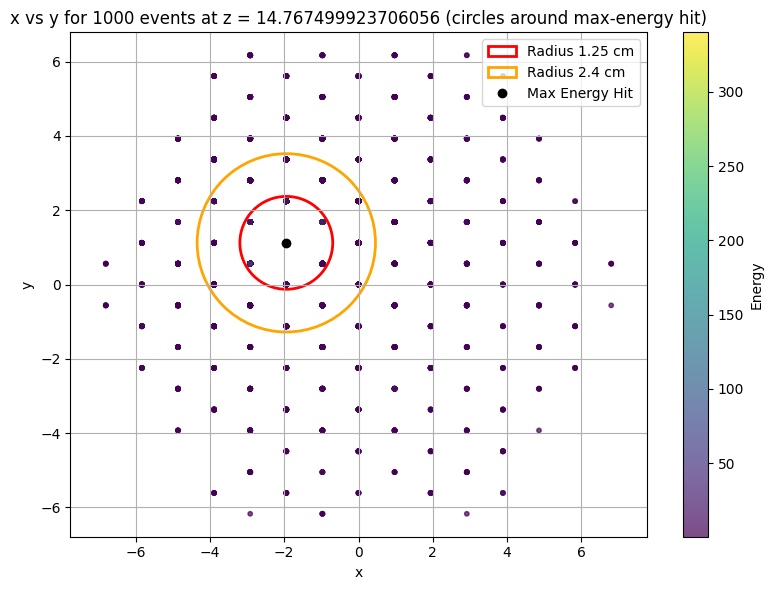

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[1]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)].copy()

# Find the hit with maximum energy
center_hit = filtered_df.loc[filtered_df['energy'].idxmax()]
x0, y0 = center_hit['x'], center_hit['y']

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=10, alpha=0.7
)

# Draw circles centered at the selected hit
circle1 = patches.Circle((x0, y0), radius=1.25, edgecolor='red', facecolor='none', linewidth=2, label='Radius 1.25 cm')
circle2 = patches.Circle((x0, y0), radius=2.4, edgecolor='orange', facecolor='none', linewidth=2, label='Radius 2.4 cm')
plt.gca().add_patch(circle1)
plt.gca().add_patch(circle2)

# Plot the selected hit for visual reference
plt.plot(x0, y0, 'ko', label='Max Energy Hit')

# Labels and layout
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1000 events at z = {selected_z} (circles around max-energy hit)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.tight_layout()
plt.show()


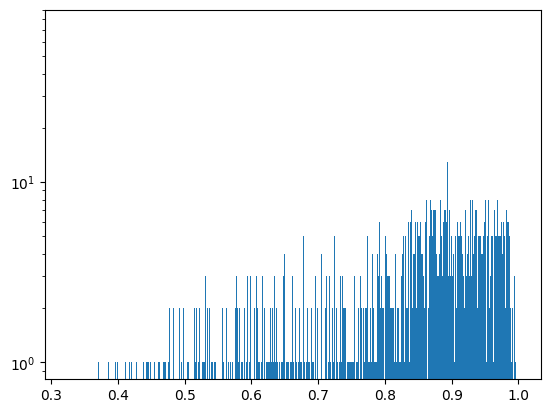

In [16]:
plt.hist(e1_over_e7, bins = 500)
plt.yscale('log')

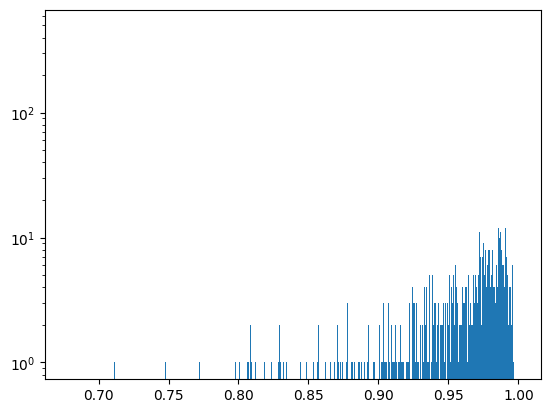

In [17]:
plt.hist(e7_over_e19, bins = 500)
plt.yscale('log')

In [ ]:
# import numpy as np

# # Get all sorted z-planes
# # Sorted_Z = sorted(df['z'].unique())

# # Select first 1000 events
# event_ids = df['event'].unique()

# # Prepare result dictionary
# z_to_e1_over_e7 = {}
# z_to_e7_over_e19 = {}

# # Loop over each z-plane
# for selected_z in Sorted_Z:
#     # Filter for current z-plane and selected events
#     filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)].copy()

#     # Skip if empty
#     if filtered_df.empty:
#         continue

#     # Initialize lists for this z
#     e1_e7_list = []
#     e7_e19_list = []

#     # Group by event
#     for event_id, event_df in filtered_df.groupby("event"):
#         # Get seed (max energy)
#         seed_hit = event_df.loc[event_df['energy'].idxmax()]
#         x0, y0 = seed_hit['x'], seed_hit['y']
#         E1 = seed_hit['energy']

#         # Distance from seed
#         dr = np.sqrt((event_df['x'] - x0)**2 + (event_df['y'] - y0)**2)

#         # Energy sums
#         E7 = event_df[dr <= 1.25]['energy'].sum()
#         E19 = event_df[dr <= 2.4]['energy'].sum()

#         # Ratios
#         e1_e7_list.append(E1 / E7 if E7 > 0 else 0)
#         e7_e19_list.append(E7 / E19 if E19 > 0 else 0)

#     # Store for this z
#     z_to_e1_over_e7[selected_z] = np.array(e1_e7_list)
#     z_to_e7_over_e19[selected_z] = np.array(e7_e19_list)

# Now you have:
# z_to_e1_over_e7[z] -> array of E1/E7 values at z
# z_to_e7_over_e19[z] -> array of E7/E19 values at z


In [6]:
import numpy as np

event_ids = df['event'].unique()
Sorted_Z = sorted(df['z'].unique())

# Prepare result dictionaries
z_to_e1_over_e7 = {}
z_to_e7_over_e19 = {}

# Loop over each z-plane
for selected_z in Sorted_Z:
    filtered_df = df[df['z'] == selected_z].copy()

    # Initialize arrays with default value 0
    e1_e7_array = np.zeros(len(event_ids))
    e7_e19_array = np.zeros(len(event_ids))

    # Map event ID to index
    event_index = {eid: idx for idx, eid in enumerate(event_ids)}

    for event_id, event_df in filtered_df.groupby("event"):
        idx = event_index[event_id]

        # Get seed (max energy)
        seed_hit = event_df.loc[event_df['energy'].idxmax()]
        x0, y0 = seed_hit['x'], seed_hit['y']
        E1 = seed_hit['energy']

        dr = np.sqrt((event_df['x'] - x0)**2 + (event_df['y'] - y0)**2)
        E7 = event_df[dr <= 1.25]['energy'].sum()
        E19 = event_df[dr <= 2.4]['energy'].sum()

        e1_e7_array[idx] = E1 / E7 if E7 > 0 else 0
        e7_e19_array[idx] = E7 / E19 if E19 > 0 else 0

    z_to_e1_over_e7[selected_z] = e1_e7_array
    z_to_e7_over_e19[selected_z] = e7_e19_array


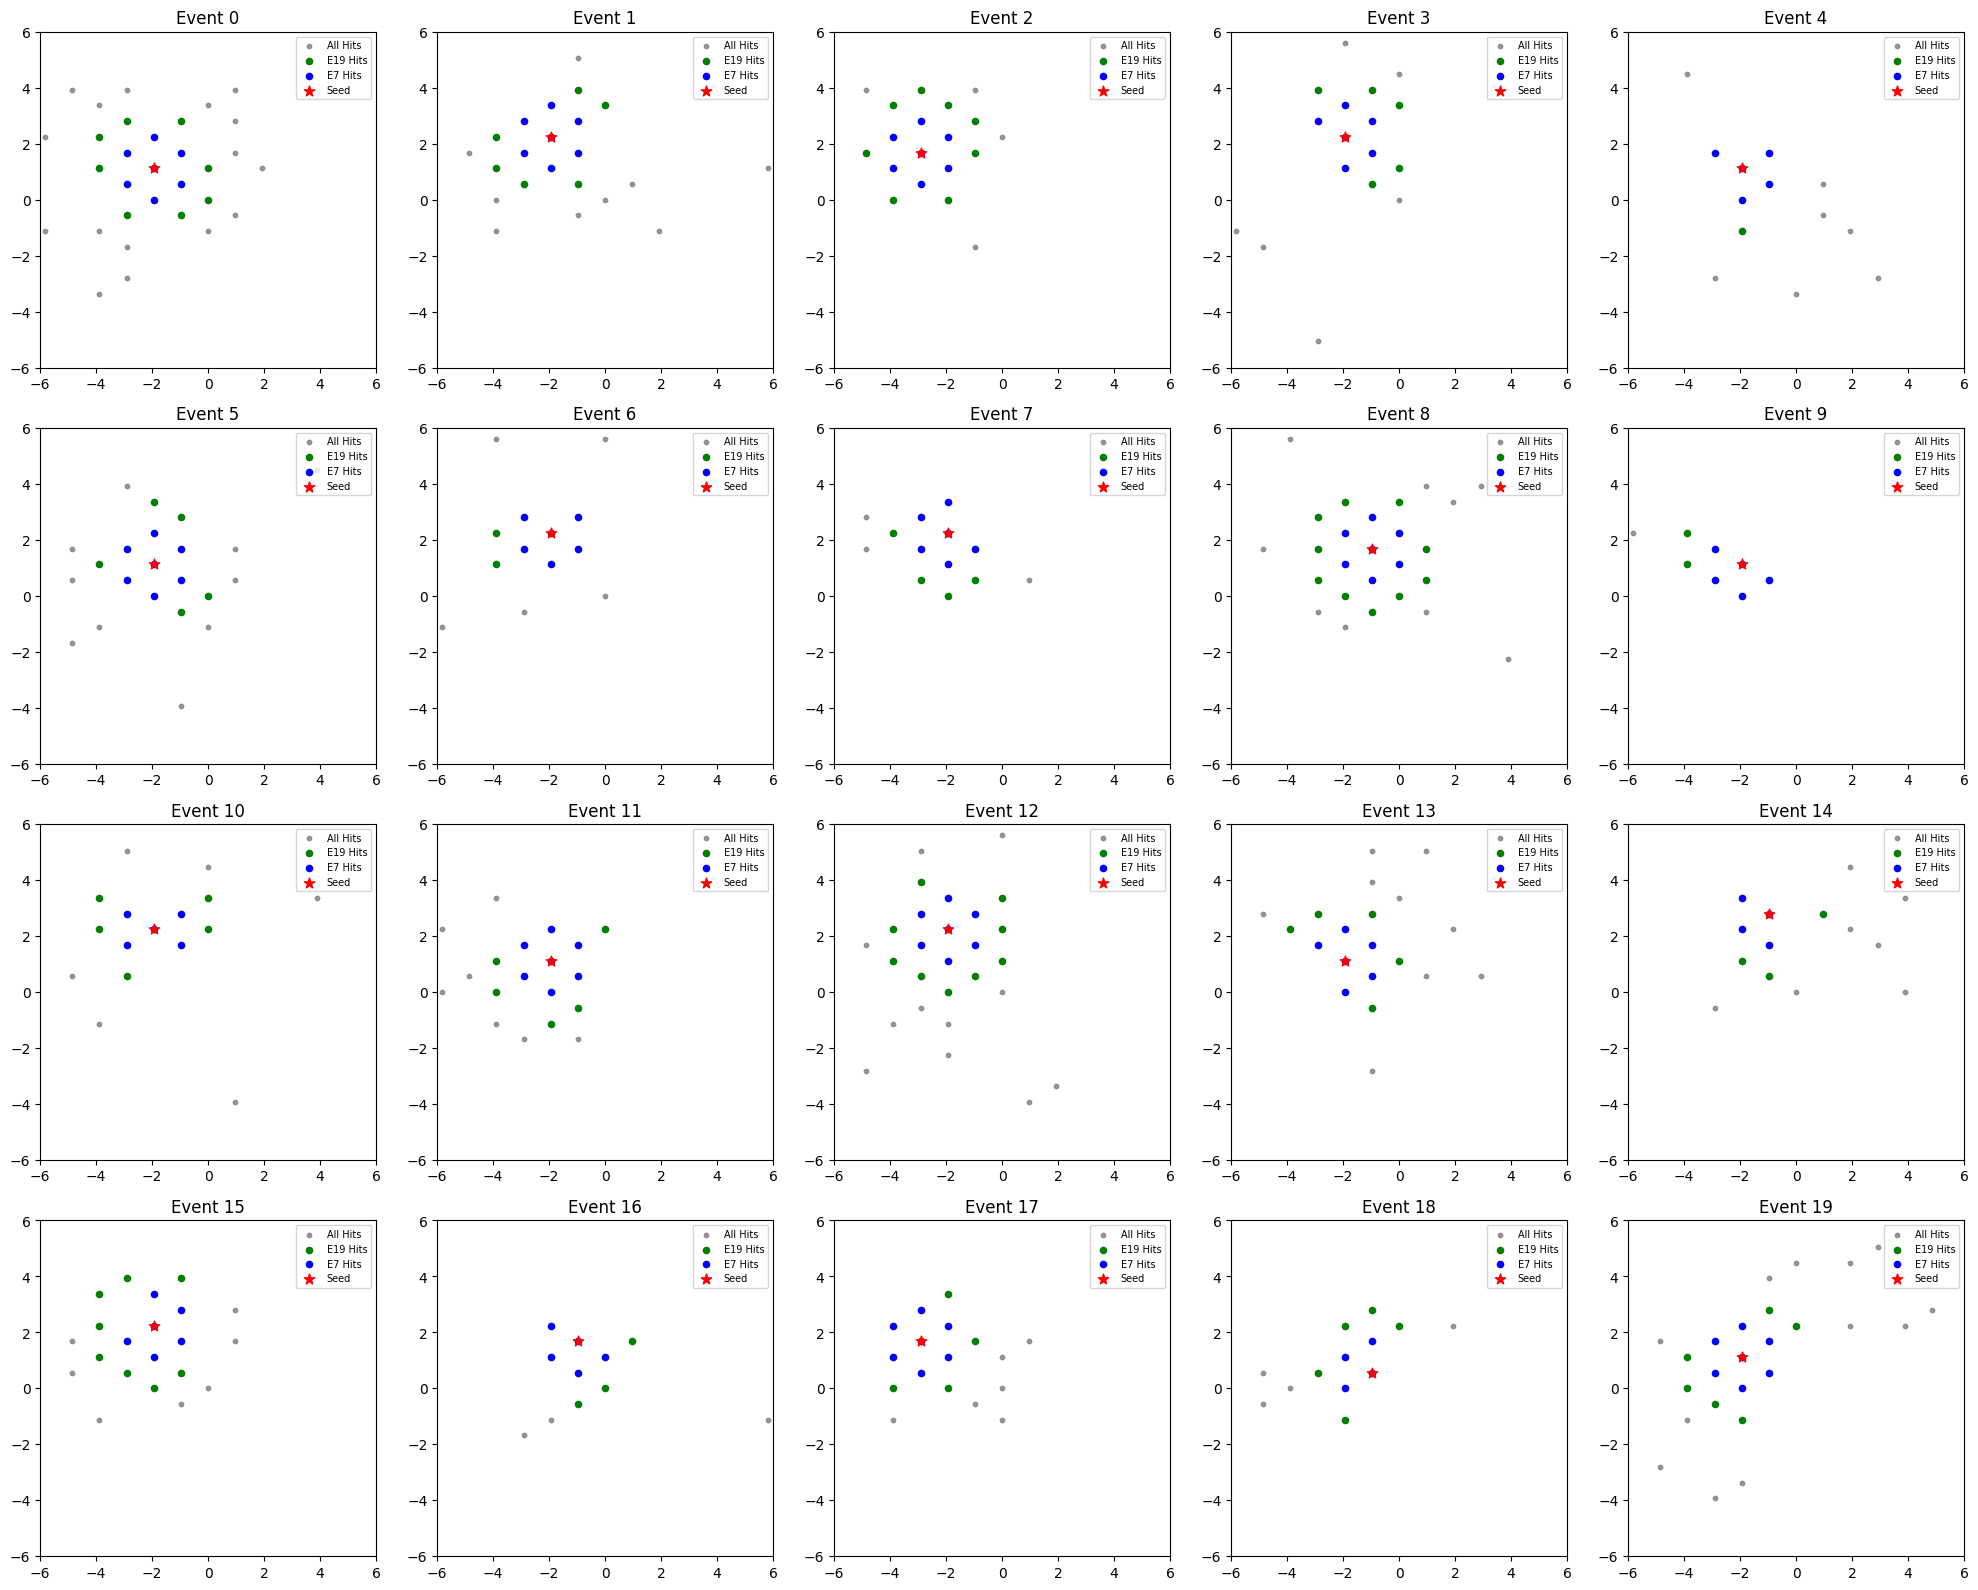

In [9]:
import matplotlib.pyplot as plt

selected_z = Sorted_Z[3]
filtered_df = df[df['z'] == selected_z].copy()

# Only take first 20 unique event IDs
event_ids_subset = filtered_df['event'].unique()[:20]

# Create subplots
fig, axs = plt.subplots(4, 5, figsize=(20, 16))
axs = axs.flatten()

for i, event_id in enumerate(event_ids_subset):
    ax = axs[i]
    event_df = filtered_df[filtered_df['event'] == event_id]

    # Seed hit
    seed_hit = event_df.loc[event_df['energy'].idxmax()]
    x0, y0 = seed_hit['x'], seed_hit['y']

    dr = np.sqrt((event_df['x'] - x0)**2 + (event_df['y'] - y0)**2)

    # Regions
    all_hits = event_df
    e7_hits = event_df[dr <= 1.25]
    e19_hits = event_df[(dr > 1.25) & (dr <= 2.4)]
    seed = seed_hit

    # Plot
    # ax.scatter(all_hits['x'], all_hits['y'], s=5, color='lightgray', label='All Hits')
    ax.scatter(all_hits['x'], all_hits['y'], s=10, color='gray', alpha=0.8, label='All Hits')
    ax.scatter(e19_hits['x'], e19_hits['y'], s=20, color='green', label='E19 Hits')
    ax.scatter(e7_hits['x'], e7_hits['y'], s=20, color='blue', label='E7 Hits')
    ax.scatter(seed['x'], seed['y'], s=60, color='red', marker='*', label='Seed')

    ax.set_xlim(-6, 6)
    ax.set_ylim(-6, 6)

    ax.set_title(f'Event {event_id}')
    ax.set_aspect('equal')
    ax.legend(loc='upper right', fontsize=7)

plt.tight_layout()
plt.show()


In [7]:
z_to_e1_over_e7

{13.8774995803833: array([1.        , 0.80477085, 0.88711568, ..., 1.        , 0.68198686,
        0.81690858]),
 14.767499923706056: array([0.92714224, 0.86738575, 0.78360974, ..., 0.86352784, 0.84085353,
        0.92488892]),
 16.782499313354492: array([0.7267833 , 0.64388624, 0.59222396, ..., 0.71586998, 0.59511221,
        0.69327791]),
 17.672500610351562: array([0.78229298, 0.84483817, 0.65189525, ..., 0.87539221, 0.70195875,
        0.69912248]),
 19.6875: array([0.60652137, 0.62362943, 0.53022161, ..., 0.66672879, 0.40451329,
        0.52892665]),
 20.57749938964844: array([0.67661991, 0.75984128, 0.61472519, ..., 0.79537875, 0.43104709,
        0.58160126]),
 22.6924991607666: array([0.50433739, 0.59919717, 0.51483865, ..., 0.51390342, 0.40224925,
        0.37672876]),
 23.582500457763672: array([0.64292011, 0.70384397, 0.6708541 , ..., 0.64838768, 0.47900706,
        0.41988838]),
 25.69750022888184: array([0.48167001, 0.52995778, 0.52092226, ..., 0.46987469, 0.40459223,
    

In [8]:
import pickle

with open('z_to_e1_over_e7.pkl', 'wb') as f:
    pickle.dump(z_to_e1_over_e7, f)

In [9]:
with open('z_to_e7_over_e19.pkl', 'wb') as f:
    pickle.dump(z_to_e7_over_e19, f)

In [27]:
# import numpy as np

# # Load the original file
# data = np.load('rechit_energy_ratios.npz')
# z_energy_sum = data['z_energy_sum']
# e1_over_e7 = data['e1_over_e7'].copy()     # Copy existing array
# e7_over_e19 = data['e7_over_e19'].copy()

# # Replace only the updated z-layers
# for z in z_to_e1_over_e7:
#     e1_over_e7[z] = z_to_e1_over_e7[z]
# for z in z_to_e7_over_e19:
#     e7_over_e19[z] = z_to_e7_over_e19[z]

# # Save back
# np.savez('rechit_energy_ratios.npz',
#          z_energy_sum=z_energy_sum,
#          e1_over_e7=e1_over_e7,
#          e7_over_e19=e7_over_e19)

# Infer shape
z_indices = sorted(z_to_e1_over_e7.keys())
# num_z = max(z_indices) + 1
# num_events = len(next(iter(z_to_e1_over_e7.values())))

num_z = int(max(z_indices)) + 1
num_events = int(len(next(iter(z_to_e1_over_e7.values()))))

# Initialize empty arrays
new_e1_over_e7 = np.zeros((num_z, num_events))
new_e7_over_e19 = np.zeros((num_z, num_events))

# Fill them
for z in z_to_e1_over_e7:
    new_e1_over_e7[int(z)] = z_to_e1_over_e7[z]

for z in z_to_e7_over_e19:
    new_e7_over_e19[int(z)] = z_to_e7_over_e19[z]



ValueError: could not broadcast input array from shape (49985,) into shape (49936,)

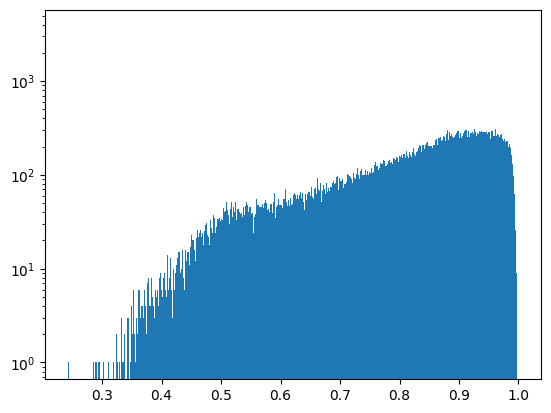

In [23]:
plt.hist(z_to_e1_over_e7[Sorted_Z[1]], bins = 500)
plt.yscale('log')

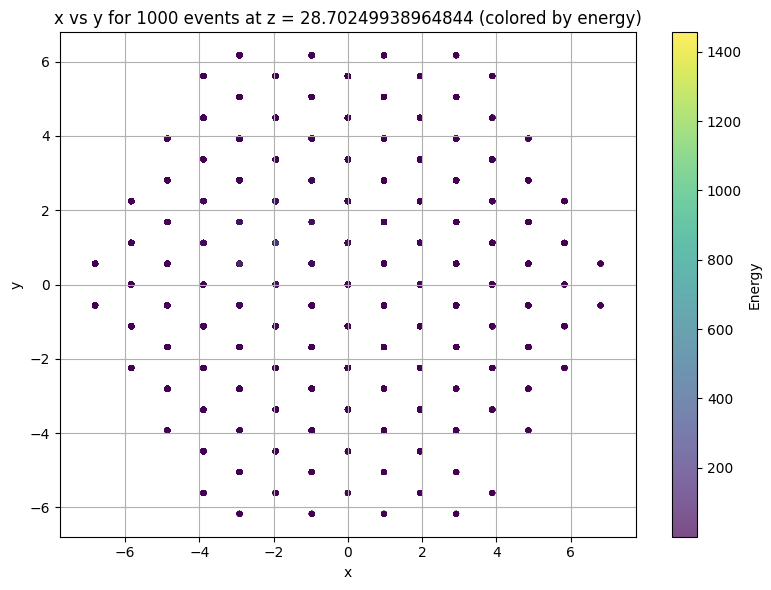

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[10]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=10, alpha=0.7  # s increased to 10
)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1000 events at z = {selected_z} (colored by energy)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

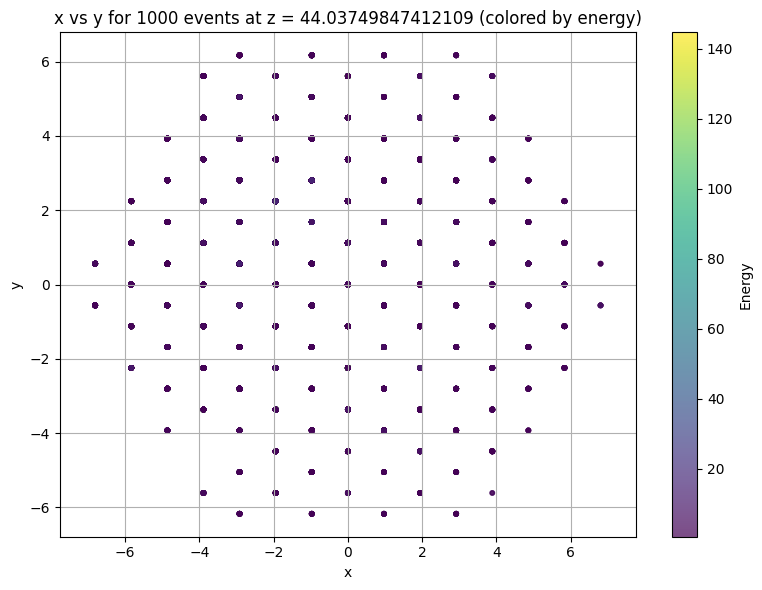

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[21]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter for 1000 events and selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot x vs y, colored by energy
plt.figure(figsize=(8, 6))
sc = plt.scatter(
    filtered_df['x'], filtered_df['y'],
    c=filtered_df['energy'], cmap='viridis', s=10, alpha=0.7  # s increased to 10
)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'x vs y for 1000 events at z = {selected_z} (colored by energy)')
plt.colorbar(sc, label='Energy')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

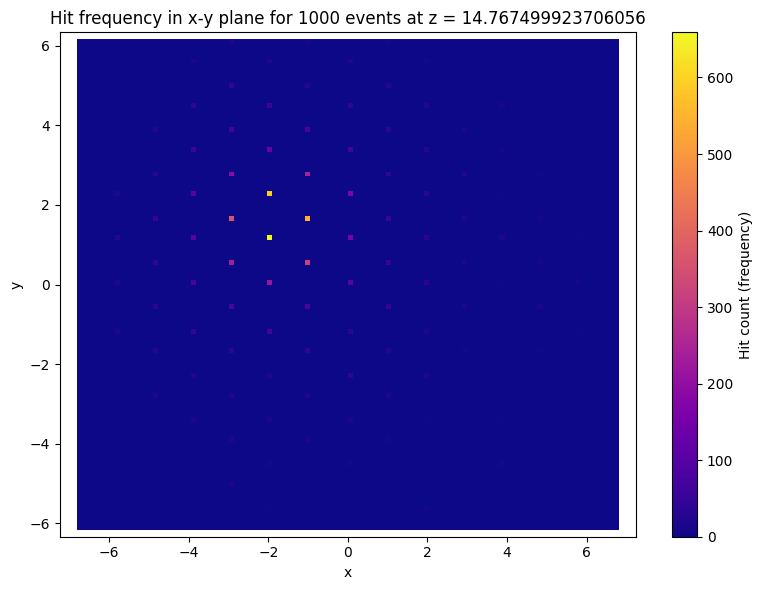

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[1]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]

# Filter data for 1000 events at selected z-plane
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot 2D histogram (frequency heatmap)
plt.figure(figsize=(8, 6))
counts, xedges, yedges, im = plt.hist2d(
    filtered_df['x'], filtered_df['y'],
    bins=100, cmap='plasma'
)

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit frequency in x-y plane for 1000 events at z = {selected_z}')
plt.colorbar(im, label='Hit count (frequency)')
plt.axis('equal')
plt.tight_layout()
plt.show()


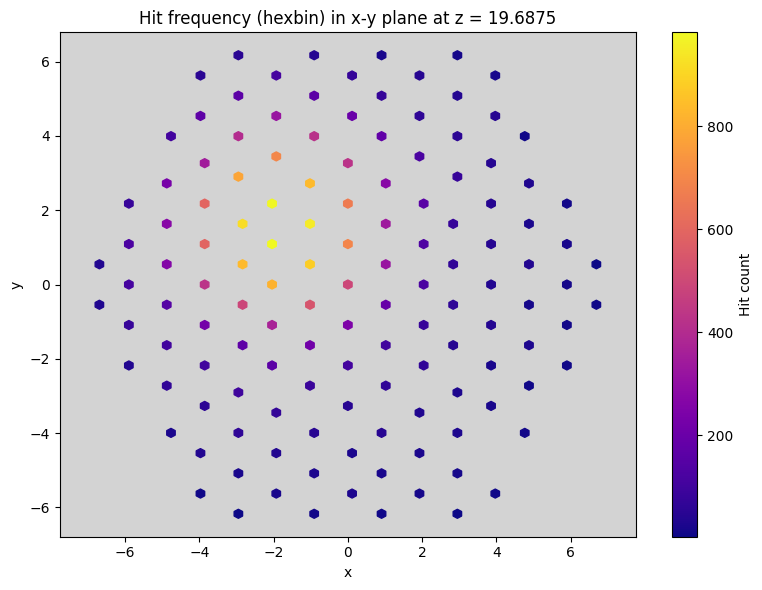

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[4]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot hexbin with transparent 0-counts
fig, ax = plt.subplots(figsize=(8, 6))
hb = ax.hexbin(
    filtered_df['x'], filtered_df['y'],
    gridsize=60, cmap='plasma', mincnt=1  # Skip bins with 0 hits
)

# Optional: light gray background to enhance visibility
ax.set_facecolor("lightgray")

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit frequency (hexbin) in x-y plane at z = {selected_z}')
plt.colorbar(hb, label='Hit count')
plt.axis('equal')
plt.tight_layout()
plt.show()


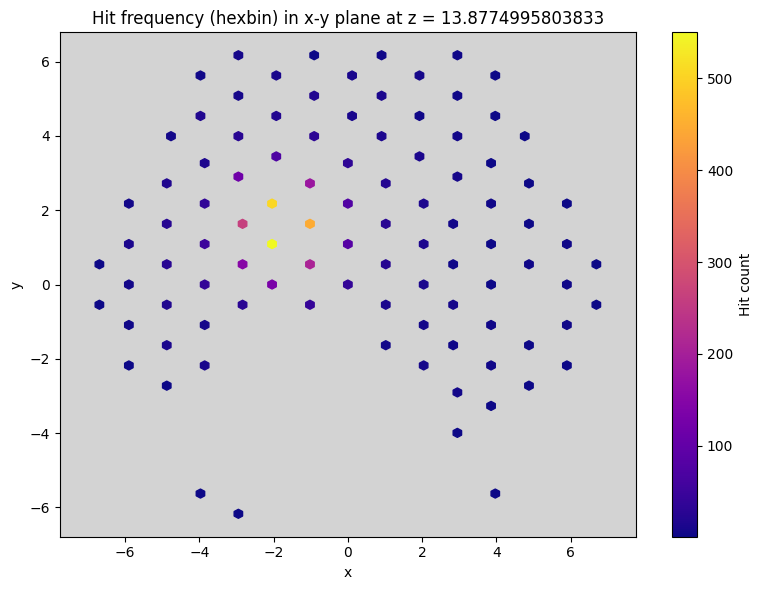

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[0]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot hexbin with transparent 0-counts
fig, ax = plt.subplots(figsize=(8, 6))
hb = ax.hexbin(
    filtered_df['x'], filtered_df['y'],
    gridsize=60, cmap='plasma', mincnt=1  # Skip bins with 0 hits
)

# Optional: light gray background to enhance visibility
ax.set_facecolor("lightgray")

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit frequency (hexbin) in x-y plane at z = {selected_z}')
plt.colorbar(hb, label='Hit count')
plt.axis('equal')
plt.tight_layout()
plt.show()

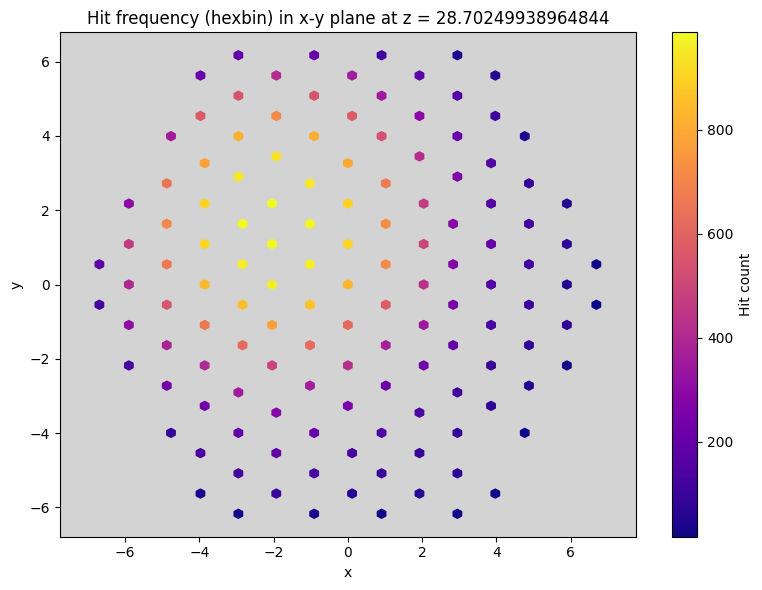

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[10]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot hexbin with transparent 0-counts
fig, ax = plt.subplots(figsize=(8, 6))
hb = ax.hexbin(
    filtered_df['x'], filtered_df['y'],
    gridsize=60, cmap='plasma', mincnt=1  # Skip bins with 0 hits
)

# Optional: light gray background to enhance visibility
ax.set_facecolor("lightgray")

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit frequency (hexbin) in x-y plane at z = {selected_z}')
plt.colorbar(hb, label='Hit count')
plt.axis('equal')
plt.tight_layout()
plt.show()

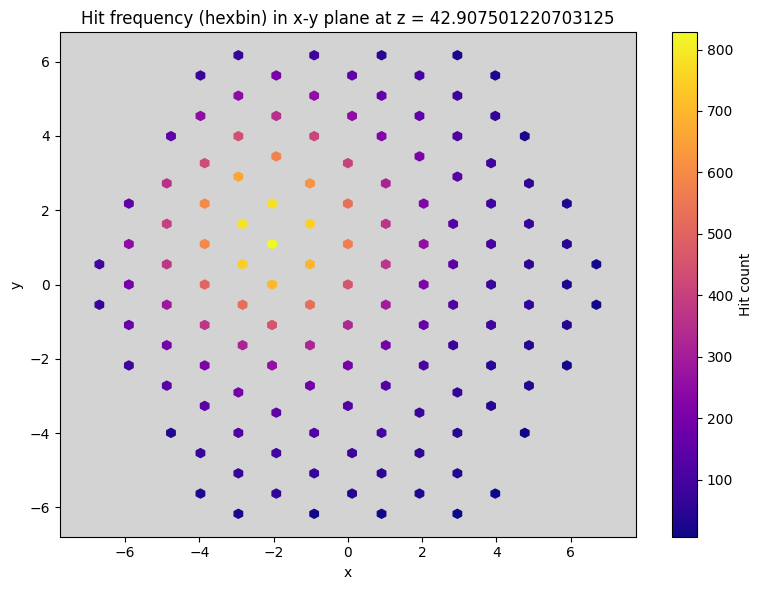

In [ ]:
# Sort unique z-planes
Sorted_Z = sorted(df['z'].unique())
selected_z = Sorted_Z[20]

# Get first 1000 events
event_ids = df['event'].unique()[:1000]
filtered_df = df[(df['event'].isin(event_ids)) & (df['z'] == selected_z)]

# Plot hexbin with transparent 0-counts
fig, ax = plt.subplots(figsize=(8, 6))
hb = ax.hexbin(
    filtered_df['x'], filtered_df['y'],
    gridsize=60, cmap='plasma', mincnt=1  # Skip bins with 0 hits
)

# Optional: light gray background to enhance visibility
ax.set_facecolor("lightgray")

plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Hit frequency (hexbin) in x-y plane at z = {selected_z}')
plt.colorbar(hb, label='Hit count')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
from scipy.spatial import cKDTree
import numpy as np
import pandas as pd

# Assume df is already loaded
Sorted_Z = np.sort(df['z'].unique())
num_z = len(Sorted_Z)
num_events = df['event'].nunique()

# Preallocate result array
e1_over_e7 = np.zeros((num_z, num_events))

# Group by event
grouped = df.groupby("event")

# Loop over events
for evt_id, event_df in grouped:
    E_evt = event_df["energy"].values
    X_evt = event_df["x"].values
    Y_evt = event_df["y"].values
    Z_evt = event_df["z"].values

    for z_idx, z_val in enumerate(Sorted_Z):
        mask = Z_evt == z_val
        if not np.any(mask):
            e1_over_e7[z_idx, evt_id] = 0.0
            continue

        e_z = E_evt[mask]
        x_z = X_evt[mask]
        y_z = Y_evt[mask]

        seed_idx = np.argmax(e_z)
        seed_pos = np.array([x_z[seed_idx], y_z[seed_idx]])
        seed_E = e_z[seed_idx]

        tree = cKDTree(np.vstack([x_z, y_z]).T)
        k = min(7, len(e_z))  # Seed + 6 neighbors
        dists, indices = tree.query(seed_pos, k=k)

        E7 = np.sum(e_z[indices])
        ratio = seed_E / E7 if E7 != 0 else 0.0
        e1_over_e7[z_idx, evt_id] = ratio
        # print('evt_id: ',evt_id)
        # print('ratio: ',ratio)

In [ ]:
import pandas as pd
import numpy as np
from scipy.spatial import cKDTree

# Ensure your dataframe is loaded and has x, y, z, energy
assert all(col in df.columns for col in ['x', 'y', 'z', 'energy'])

# Create global lookup table using all rechits
all_coords = df[['x', 'y']].values  # 2D positions only
all_energy = df['energy'].values   # Associated energy
all_z = df['z'].values             # Z values (can be useful in lookup)

# Build KDTree on (x, y) positions
global_tree = cKDTree(all_coords)

# Bundle into one unified lookup table
global_lookup_table = {
    'tree': global_tree,
    'coords': all_coords,
    'energy': all_energy,
    'z': all_z
}

print(f"✅ Global lookup table built with {len(all_coords)} hits across all z-planes.")


✅ Global lookup table built with 39965823 hits across all z-planes.


In [ ]:
def get_nearest_hits(x, y, k=6, include_seed=False):
    tree = global_lookup_table['tree']
    coords = global_lookup_table['coords']
    energy = global_lookup_table['energy']
    z_vals = global_lookup_table['z']

    query_k = k if include_seed else k + 1
    distances, indices = tree.query([x, y], k=query_k)

    if not include_seed:
        indices = indices[1:]

    return {
        'coords': coords[indices],
        'energy': energy[indices],
        'z': z_vals[indices],
        'distance': distances if include_seed else distances[1:]
    }


In [ ]:
seed_x, seed_y = 0.0, 0.0
neighbors = get_nearest_hits(seed_x, seed_y, k=6)

print("Nearest Coordinates:\n", neighbors['coords'])
print("Nearest Energies:\n", neighbors['energy'])
print("Corresponding z-values:\n", neighbors['z'])


Nearest Coordinates:
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
Nearest Energies:
 [ 8.2934618   5.17270947  1.14821029  6.2754612  36.67232132  3.07208347]
Corresponding z-values:
 [39.92250061 28.70249939 29.59250069 28.70249939 38.00749969 26.58749962]


In [ ]:
from scipy.spatial import cKDTree
import numpy as np

def analyze_event_neighbors(event_id, k=6, include_seed=False, energy_threshold=1e-3):
    event_df = df[df['event'] == event_id].reset_index(drop=True)

    coords = event_df[['x', 'y', 'z']].values
    energies = event_df['energy'].values
    tree = cKDTree(coords)

    results = []

    for i, (seed_coord, seed_energy) in enumerate(zip(coords, energies)):
        query_k = k if include_seed else k + 1

        # Handle case with fewer than k neighbors
        max_k = min(query_k, len(coords))
        dists, idxs = tree.query(seed_coord, k=max_k)

        # Force idxs to be iterable
        if max_k == 1:
            idxs = [idxs]
            dists = [dists]

        if not include_seed and len(idxs) > 1:
            idxs = idxs[1:]
            dists = dists[1:]

        neighbor_coords = coords[idxs]
        neighbor_energies = energies[idxs]
        has_energy = neighbor_energies > energy_threshold
        has_rechit = np.ones(len(idxs), dtype=bool)

        # Pad if fewer than k
        pad_size = k - len(idxs)
        if pad_size > 0:
            neighbor_coords = np.vstack([neighbor_coords, np.zeros((pad_size, 3))])
            neighbor_energies = np.concatenate([neighbor_energies, np.zeros(pad_size)])
            has_energy = np.concatenate([has_energy, np.zeros(pad_size, dtype=bool)])
            has_rechit = np.concatenate([has_rechit, np.zeros(pad_size, dtype=bool)])

        results.append({
            'seed_index': i,
            'seed_coord': seed_coord,
            'seed_energy': seed_energy,
            'neighbor_coords': neighbor_coords,
            'neighbor_energies': neighbor_energies,
            'has_rechit': has_rechit,
            'has_energy': has_energy
        })

    return results


In [ ]:
neighbors_info = analyze_event_neighbors(event_id=0)

# Inspect seed hit 0
hit0 = neighbors_info[0]
print("Seed:", hit0['seed_coord'])
print("Neighbor coords:\n", hit0['neighbor_coords'])
print("Energies:", hit0['neighbor_energies'])
print("Exists?    :", hit0['has_rechit'])
print("Non-zero E?:", hit0['has_energy'])


Seed: [-1.94352722  1.12209594 13.87749958]
Neighbor coords:
 [[-1.94352722  1.12209594 14.76749992]
 [-1.94352722  2.24419188 14.76749992]
 [-2.91529083  1.68314397 14.76749992]
 [ 0.          1.12209594 14.76749992]
 [-2.91529083  2.80523992 14.76749992]
 [-1.94352722  1.12209594 16.78249931]]
Energies: [ 99.90185547   5.81250668   2.03809595   1.3796525    2.46914864
 356.48944092]
Exists?    : [ True  True  True  True  True  True]
Non-zero E?: [ True  True  True  True  True  True]


In [ ]:
from scipy.spatial import cKDTree
import numpy as np

# Preprocessing: Build KD-Trees for each z-plane
def build_z_plane_lookup(df):
    z_lookup = {}
    for z_val in sorted(df['z'].unique()):
        z_df = df[df['z'] == z_val]
        coords = z_df[['x', 'y']].values
        energies = z_df['energy'].values

        if len(coords) < 1:
            continue
        tree = cKDTree(coords)
        z_lookup[z_val] = {
            'tree': tree,
            'coords': coords,
            'energy': energies
        }
    return z_lookup


In [ ]:
# Query function: return 6 nearest rechits at given z
def query_nearest_in_z(seed_x, seed_y, z_plane, z_lookup, k=6, energy_threshold=1e-3):
    if z_plane not in z_lookup:
        print(f"❌ No rechits in z = {z_plane}")
        return None

    entry = z_lookup[z_plane]
    tree = entry['tree']
    coords = entry['coords']
    energies = entry['energy']

    query_k = min(k, len(coords))
    dists, idxs = tree.query([seed_x, seed_y], k=query_k)

    # Ensure iterables even when k=1
    if query_k == 1:
        idxs = [idxs]
        dists = [dists]

    neighbor_xy = coords[idxs]
    neighbor_energy = energies[idxs]
    neighbor_z = np.full((len(idxs), 1), z_plane)
    neighbor_xyz = np.hstack([neighbor_xy, neighbor_z])
    has_rechit = np.ones(len(idxs), dtype=bool)
    has_energy = neighbor_energy > energy_threshold

    # Pad if fewer than k
    pad_size = k - len(idxs)
    if pad_size > 0:
        neighbor_xyz = np.vstack([neighbor_xyz, np.zeros((pad_size, 3))])
        neighbor_energy = np.concatenate([neighbor_energy, np.zeros(pad_size)])
        has_rechit = np.concatenate([has_rechit, np.zeros(pad_size, dtype=bool)])
        has_energy = np.concatenate([has_energy, np.zeros(pad_size, dtype=bool)])

    return {
        'coords': neighbor_xyz,
        'energy': neighbor_energy,
        'has_rechit': has_rechit,
        'has_energy': has_energy
    }


In [ ]:
def query_seed_from_event(event_id, z_plane, z_lookup, df, k=6, energy_threshold=1e-3):
    # Filter hits in this event and z-plane
    event_hits = df[(df['event'] == event_id) & (df['z'] == z_plane)]

    if event_hits.empty:
        print(f"❌ No rechits for event {event_id} at z = {z_plane}")
        return None

    # Pick seed: hit with maximum energy in this z-plane
    seed_hit = event_hits.loc[event_hits['energy'].idxmax()]
    seed_x, seed_y = seed_hit['x'], seed_hit['y']

    print(f"🔍 Seed rechit at (x={seed_x:.2f}, y={seed_y:.2f}, z={z_plane}) with energy {seed_hit['energy']:.2f}")

    # Query neighbors around this seed
    result = query_nearest_in_z(seed_x, seed_y, z_plane, z_lookup, k=k, energy_threshold=energy_threshold)
    return result


In [ ]:
# Step 1: Build the KD-tree lookup table once
z_lookup = build_z_plane_lookup(df)

# Step 2: Define your inputs
event_id = 0
z_plane = Sorted_Z[4]

# Step 3: Run the query
result = query_seed_from_event(event_id, z_plane, z_lookup, df)

# Step 4: Display results
if result:
    print("Neighbor coords (x,y,z):\n", result['coords'])
    print("Energies:", result['energy'])
    print("Rechit exists?  ", result['has_rechit'])
    print("Energy > 0?     ", result['has_energy'])


🔍 Seed rechit at (x=-1.94, y=1.12, z=19.6875) with energy 760.04
Neighbor coords (x,y,z):
 [[-1.94352722  1.12209594 19.6875    ]
 [-1.94352722  1.12209594 19.6875    ]
 [-1.94352722  1.12209594 19.6875    ]
 [-1.94352722  1.12209594 19.6875    ]
 [-1.94352722  1.12209594 19.6875    ]
 [-1.94352722  1.12209594 19.6875    ]]
Energies: [569.84661865  14.224226    39.86699295  51.32681656  45.82673645
 417.10955811]
Rechit exists?   [ True  True  True  True  True  True]
Energy > 0?      [ True  True  True  True  True  True]


In [ ]:
import matplotlib.pyplot as plt

def plot_global_lookup_table(z_lookup):
    all_x = []
    all_y = []
    all_z = []

    # Gather all (x, y, z) points from the lookup
    for z_plane, entry in z_lookup.items():
        coords = entry['coords']
        all_x.append(coords[:, 0])
        all_y.append(coords[:, 1])
        all_z.append(np.full(len(coords), z_plane))

    all_x = np.concatenate(all_x)
    all_y = np.concatenate(all_y)
    all_z = np.concatenate(all_z)

    # Plot: color = z-plane
    plt.figure(figsize=(8, 7))
    sc = plt.scatter(all_x, all_y, c=all_z, cmap='plasma', s=8, alpha=0.7)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Global Rechit Lookup Table (All z-planes)')
    plt.colorbar(sc, label='z-plane')
    plt.axis('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_global_lookup_table(z_lookup):
    all_x = []
    all_y = []
    all_z = []

    # Gather all (x, y, z) points from the lookup
    for z_plane, entry in z_lookup.items():
        coords = entry['coords']
        all_x.append(coords[:, 0])
        all_y.append(coords[:, 1])
        all_z.append(np.full(len(coords), z_plane))

    all_x = np.concatenate(all_x)
    all_y = np.concatenate(all_y)
    all_z = np.concatenate(all_z)

    # Plot: color = z-plane
    plt.figure(figsize=(8, 7))
    sc = plt.scatter(all_x, all_y, c=all_z, cmap='plasma', s=8, alpha=0.7)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Global Rechit Lookup Table (All z-planes)')
    plt.colorbar(sc, label='z-plane')
    plt.axis('equal')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_global_lookup_table(Sorted_Z[4])

AttributeError: 'numpy.float64' object has no attribute 'items'